# Logistic Regression
- Cancer use case

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [301]:
#1. Collecting the data
data = pd.read_csv('./Datasets/data.csv')
data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [302]:
#2. Data Wrangling
data.drop('Unnamed: 32', axis=1, inplace=True)

In [303]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [304]:
# id is irrelevant to the machine learning algorithm
data.drop('id', axis=1, inplace=True)

In [305]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


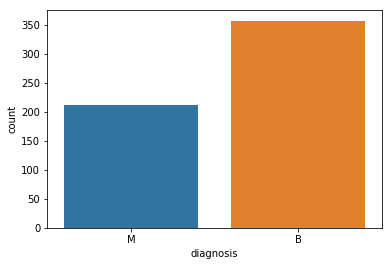

In [306]:
import seaborn as sns
sns.countplot(data['diagnosis'], label='Count')
plt.show()

In [307]:
# data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
# data.head()

In [308]:
##3. Analyze the Data
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)


(398, 31)
(171, 31)


In [309]:
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
268,B,12.87,16.21,82.38,512.2,0.09425,0.06219,0.039000,0.016150,0.2010,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.199200,0.05780,0.3604,0.07062
224,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.035540,0.024560,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.178600,0.09678,0.2506,0.07623
94,M,15.06,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,...,18.23,24.23,123.50,1025.0,0.1551,0.4203,0.520300,0.21150,0.2834,0.08234
45,M,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.197400,0.100900,0.1907,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.734500,0.23780,0.3799,0.09185
327,B,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,...,13.07,22.25,82.74,523.4,0.1013,0.0739,0.007732,0.02796,0.2171,0.07037


In [310]:
test.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
342,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,...,11.92,19.90,79.76,440.0,0.1418,0.2210,0.2299,0.10750,0.3301,0.09080
452,B,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,...,13.09,37.88,85.07,523.7,0.1208,0.1856,0.1811,0.07116,0.2447,0.08194
12,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230
92,B,13.27,14.76,84.74,551.7,0.07355,0.05055,0.03261,0.02648,0.1386,...,16.36,22.35,104.50,830.6,0.1006,0.1238,0.1350,0.10010,0.2027,0.06206
86,M,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,...,16.21,29.25,108.40,808.9,0.1306,0.1976,0.3349,0.12250,0.3020,0.06846


In [311]:
# relevant columns
data.head()
prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                  'smoothness_mean','compactness_mean','concavity_mean', 'concave points_mean','symmetry_mean','fractal_dimension_mean']

In [312]:
# input training data
train_X = train[prediction_var]

# output training data
train_Y = train['diagnosis']

# same steps for testing data
# input testing data
test_X = test[prediction_var]

# outut testing data
test_Y = test['diagnosis']


In [313]:
#4. Training the model
logistic_model = LogisticRegression()

logistic_model.fit(train_X, train_Y)

#5. Testing the algorithm
predicted_value = logistic_model.predict(test_X)

# accuracy
metrics.accuracy_score(test_Y, predicted_value)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8947368421052632

In [314]:
pd.DataFrame({'predicted_value': predicted_value, 'Known O/P':test_Y})

,predicted_value,Known O/P
342,B,B
452,B,B
12,M,M
92,B,B
86,M,M
28,M,M
387,B,B
261,M,M
503,M,M
7,B,M


# Polynomial Regression
- Build a model which can predict the salary of an employee based on his/her Level(Grade). So we can guess whether a particular candidate is telling Truth/about his/her salary based on the Level provided by him.

- Input Data : Level and Salary
- Types of Regression
1. Simple LR Y = a + bX
2. Multiple LR Y = a + bX1 + cX2 + dX3..
3. Polynomial LR Y = a + bX + cX^2 +...


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [316]:
# data collection
dataset = pd.read_csv('./Datasets/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [317]:
# separate input and output
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2].values
X.shape

(10, 1)

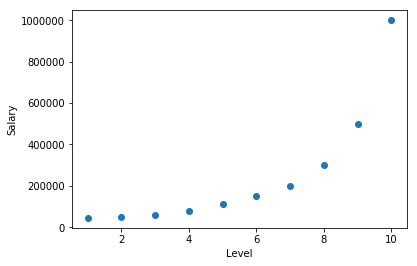

In [318]:
# data Analysis
plt.scatter(X,Y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

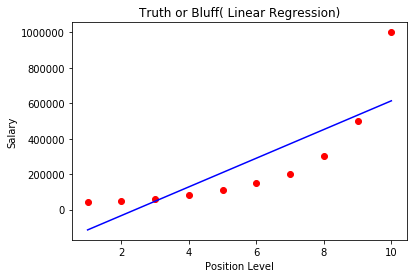

In [319]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# Fitting /Training the model
lin_reg.fit(X,Y)
predicted_value = lin_reg.predict(X)

# Visualizing the Linear Regression results
plt.scatter(X,Y, color='red')
plt.plot(X, predicted_value, color='blue')
plt.title("Truth or Bluff( Linear Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Fitting Polynomial Regression to the dataset

In [320]:
from sklearn.preprocessing import PolynomialFeatures
# try with different values of equation degree also like 2 or 3 or 5
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

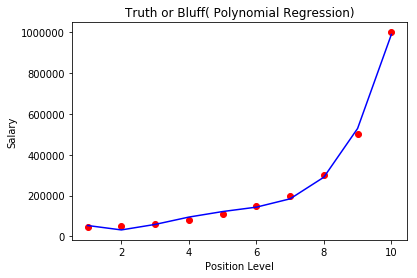

In [321]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)
predicted_value = lin_reg_2.predict(poly_reg.fit_transform(X))

# visualising the Poly Reg results
plt.scatter(X,Y, color='red')
plt.plot(X, predicted_value, color='blue')
plt.title("Truth or Bluff( Polynomial Regression)")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Classifier

In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [323]:
# data collection/loading
data = pd.read_csv('./Datasets/pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [324]:
# Data Wrangling
pred_columns = data[:]
pred_columns.drop(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude','Longitude'],
                 inplace=True,
                 axis=1)
pred_columns.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [325]:
# list of input columns
input_columns = list(pred_columns.columns)
[input_columns]

[['Maximum Wind',
  'Minimum Pressure',
  'Low Wind NE',
  'Low Wind SE',
  'Low Wind SW',
  'Low Wind NW',
  'Moderate Wind NE',
  'Moderate Wind SE',
  'Moderate Wind SW',
  'Moderate Wind NW',
  'High Wind NE',
  'High Wind SE',
  'High Wind SW',
  'High Wind NW']]

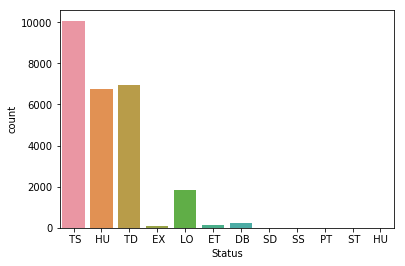

In [326]:
sns.countplot(data['Status'], label='count')
plt.show()

In [327]:
# splitting the data into training and testing
train, test = train_test_split(data, test_size=0.3)
train.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
6061,EP051975,ELEANOR,19750712,0,,TS,17.2N,103.4W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
13419,EP231990,TRUDY,19901021,0,,HU,16.1N,111.4W,125,945,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
17744,EP141998,LESTER,19981021,1200,,HU,16.5N,108.1W,90,970,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
14990,EP051993,DORA,19930719,600,,TS,17.5N,136.8W,35,1005,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
16246,EP071995,FLOSSIE,19950808,600,,TD,15.8N,105.7W,30,999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [328]:
test.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
5835,EP121974,LORRAINE,19740827,1200,,TD,16.6N,119.5W,30,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
12667,EP211989,RAYMOND,19890927,600,,TS,16.0N,103.0W,40,1001,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
19157,EP102002,HERNAN,20020906,1200,,TD,24.0N,124.6W,25,1009,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
5094,EP081972,HYACINTH,19720906,0,,TD,31.9N,119.5W,30,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2256,EP041965,BERNICE,19650703,1200,,TS,14.2N,102.8W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [329]:
# relevant columns for training
train_X = train[input_columns]
train_Y = train['Status']


# relevant columns for testing
test_X = test[input_columns]
test_Y = test['Status']


In [330]:
# model
model = tree.DecisionTreeClassifier()

# training the model
model.fit(train_X, train_Y)

# testing the model
prediction = model.predict(test_X)

# accuracy measurement for the model
metrics.accuracy_score(test_Y, prediction)

0.9562611578678909

In [331]:
#pd.DataFrame(prediction, test_Y)

In [332]:
tree.export_graphviz(model, out_file='decision_tree.dot', feature_names=input_columns)
# paste the binary file O/P in http://www.webgraphviz.com/

# Random Forest
- ensemble of many decision trees

In [333]:
from sklearn.ensemble import RandomForestClassifier
# number of decision tree is 100
model = RandomForestClassifier(n_estimators=100)

#training
model.fit(train_X, train_Y)

# testing
prediction = model.predict(test_X)

# accuracy
metrics.accuracy_score(test_Y, prediction)

0.9570262688089773